In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
data = pd.read_csv('german_credit.csv')

In [4]:
# Lets build a Ensemble model but need to modify the dataset first
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
data.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [7]:
# Print Shape of model data
data.shape

(1000, 21)

In [8]:
data_d = pd.get_dummies(data)

In [9]:
data_d.head(5)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [10]:
data_d.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [11]:
x = data_d.drop(['default'], axis=1)
y = data_d['default']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

### Q4 Build Random Forest Model( 2 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=50,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(x_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_predict = rfcl.predict(x_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_predict))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, y_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_predict))

=== Confusion Matrix ===
[[199  15]
 [ 56  30]]


=== Accuracy Score ===
0.7633333333333333


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       214
           1       0.67      0.35      0.46        86

    accuracy                           0.76       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.75      0.76      0.74       300



### Q6 Show the list of the features importance( 1 Marks)

In [15]:
feature_importances = pd.DataFrame(rfcl.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                                    importance
credit_amount                                         0.096543
age                                                   0.080317
duration_in_month                                     0.073428
account_check_status_no checking account              0.045760
installment_as_income_perc                            0.034843
present_res_since                                     0.030889
account_check_status_< 0 DM                           0.029697
credit_history_critical account/ other credits ...    0.028335
savings_... < 100 DM                                  0.021253
other_installment_plans_none                          0.018303
purpose_car (new)                                     0.018098
purpose_domestic appliances                           0.017766
credits_this_bank                                     0.017761
personal_status_sex_male : single                     0.016677
personal_status_sex_female : divorced/separated...    0

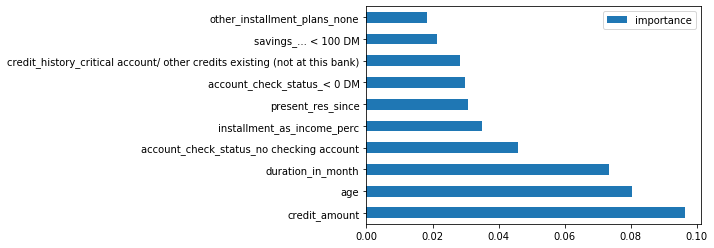

In [16]:
feature_importances.nlargest(10, 'importance').plot(kind='barh')

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
# Use below values
num_folds = 10
seed = 77

In [19]:
#Validate the Random Forest model build above using k fold

In [20]:
kfold = KFold(num_folds, True, seed)
kfold

KFold(n_splits=10, random_state=77, shuffle=True)

In [21]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [22]:
get_score(RandomForestClassifier(),x_train, x_test, y_train, y_test)

0.72

In [23]:
score_rfcl = []

In [24]:
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    score_rfcl.append(get_score(RandomForestClassifier(),x_train, x_test, y_train, y_test))

In [25]:
score_rfcl

[0.78, 0.8, 0.69, 0.83, 0.74, 0.68, 0.73, 0.73, 0.71, 0.76]

In [26]:
cross_val_score(RandomForestClassifier(), x_train, y_train, cv=10)

array([0.75555556, 0.7       , 0.73333333, 0.7       , 0.77777778,
       0.75555556, 0.66666667, 0.81111111, 0.74444444, 0.73333333])

In [27]:
#Calculate Mean score

In [28]:
print(np.mean(cross_val_score(RandomForestClassifier(), x_train, y_train, cv=10)))

0.7388888888888889


In [29]:
# Calculate score standard deviation using std()

In [30]:
print(np.std(cross_val_score(RandomForestClassifier(), x_train, y_train, cv=10)))

0.04074915737976056


# Q8 Build Ada boosting model, check the accuracy, and print confusion matrix ( 1 Marks)

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [33]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [34]:
abc = abc.fit(x_train, y_train)

In [35]:
y_pred = abc.predict(x_test)

In [36]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))

=== Confusion Matrix ===
[[184  33]
 [ 33  50]]


=== Accuracy Score ===
0.78


# Q9. Build Gradient boosting model, check the accuracy, and print confusion matrix ( 1 Marks)
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

In [38]:
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf = gb_clf.fit(x_train, y_train)

In [39]:
gb_clf.score(x_train, y_train)

0.8057142857142857

In [40]:
gb_clf.score(x_test, y_test)

0.78

In [41]:
y_gb_predict = gb_clf.predict(x_test)

In [42]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_gb_predict))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, y_gb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_gb_predict))

=== Confusion Matrix ===
[[192  25]
 [ 41  42]]


=== Accuracy Score ===
0.78


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       217
           1       0.63      0.51      0.56        83

    accuracy                           0.78       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [43]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [44]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [45]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7693333333333333
Standard deviation:  0.016519348924485148
